In [ ]:
#'RESPAGE', 'FATEINLF','BUSINRUS','BUSINTUR', 'BUSINGA', 'NEIGHBOR', 'USSRDISS', 'EUSUPP', 'EEUSUPNA', 'EEUNSUW', 'EEUSUPW', 'MAINFRN', 'MAINENEM', 'PARTYSUPP', 'WORKTYP', 'PERSINC', 'EDUYRS', 'RFAEDUC', 'RMOEDUC', 'RELIMP', 'ECONSTN', 'MONYTOT'

## Printing the label descriptions

In [14]:
import pandas as pd
import pyreadstat

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Function to print the description for each variable's values
def print_variable_descriptions(meta):
    for var_name in meta.column_names:
        if var_name in meta.variable_to_label:
            print(f"Variable: {var_name} - {meta.column_labels[meta.column_names.index(var_name)]}")
            value_labels = meta.value_labels.get(meta.variable_to_label.get(var_name), {})
            #for value, label in value_labels.items():
                #print(f"  Value: {value} - Description: {label}")
            print()  # Add a blank line between variables for readability

# Print the descriptions for each variable's values
print_variable_descriptions(meta)

Variable: COUNTRY - Country

Variable: RESPONSE - Response

Variable: AAPOR - AAPOR disposition code

Variable: SETTYPE - Stratum

Variable: RESPSEX - Respondent's sex

Variable: RESPAGE - Respondent's age

Variable: AGEGROUP - Age groups

Variable: ACTCHORE - Helped a neighbor or a friend with some household chores or childcare?

Variable: ACTRESDT - Helped someone to resolve a dispute?

Variable: ACTCLEAN - Helped cleaning public space?

Variable: ACTTHEA - Went to a theatre or cinema?

Variable: ACTREST - Went to a restaurant?

Variable: ACTVLNT - Did volunteer work without expecting compensation?

Variable: ACTCOMM - Made a comment online?

Variable: ACTDNCH - Donated money to a church or mosque?

Variable: ACTNRCHN - Donated money to a nonreligious charity?

Variable: ACTPBLM - Attended a public meeting?

Variable: ACTSPET - Signed a petition or a demand, request?

Variable: ACTDON - Made a donation to a trustworthy organization

Variable: RATEHAP - How happy would you say you are

## Understand The Data By Plotting 

Plotting variable: RESPAGE_segmented
RESPAGE_segmented_mapped
56+      644
36-55    478
18-35    369
Name: count, dtype: int64
Plotting variable: FATEINLF
FATEINLF_mapped
People shape their fate themselves          378
5.0                                         364
Everything in life is determined by fate    190
8.0                                         128
7.0                                         114
6.0                                         107
9.0                                          61
3.0                                          57
4.0                                          47
2.0                                          38
Don't know                                    6
Refuse to answer                              1
Name: count, dtype: int64
Plotting variable: BUSINRUS
BUSINRUS_mapped
Approve             1265
Disapprove           200
Don't know            25
Refuse to answer       1
Name: count, dtype: int64
Plotting variable: BUSINTUR
BUSINTUR_mapped
Disapprove   

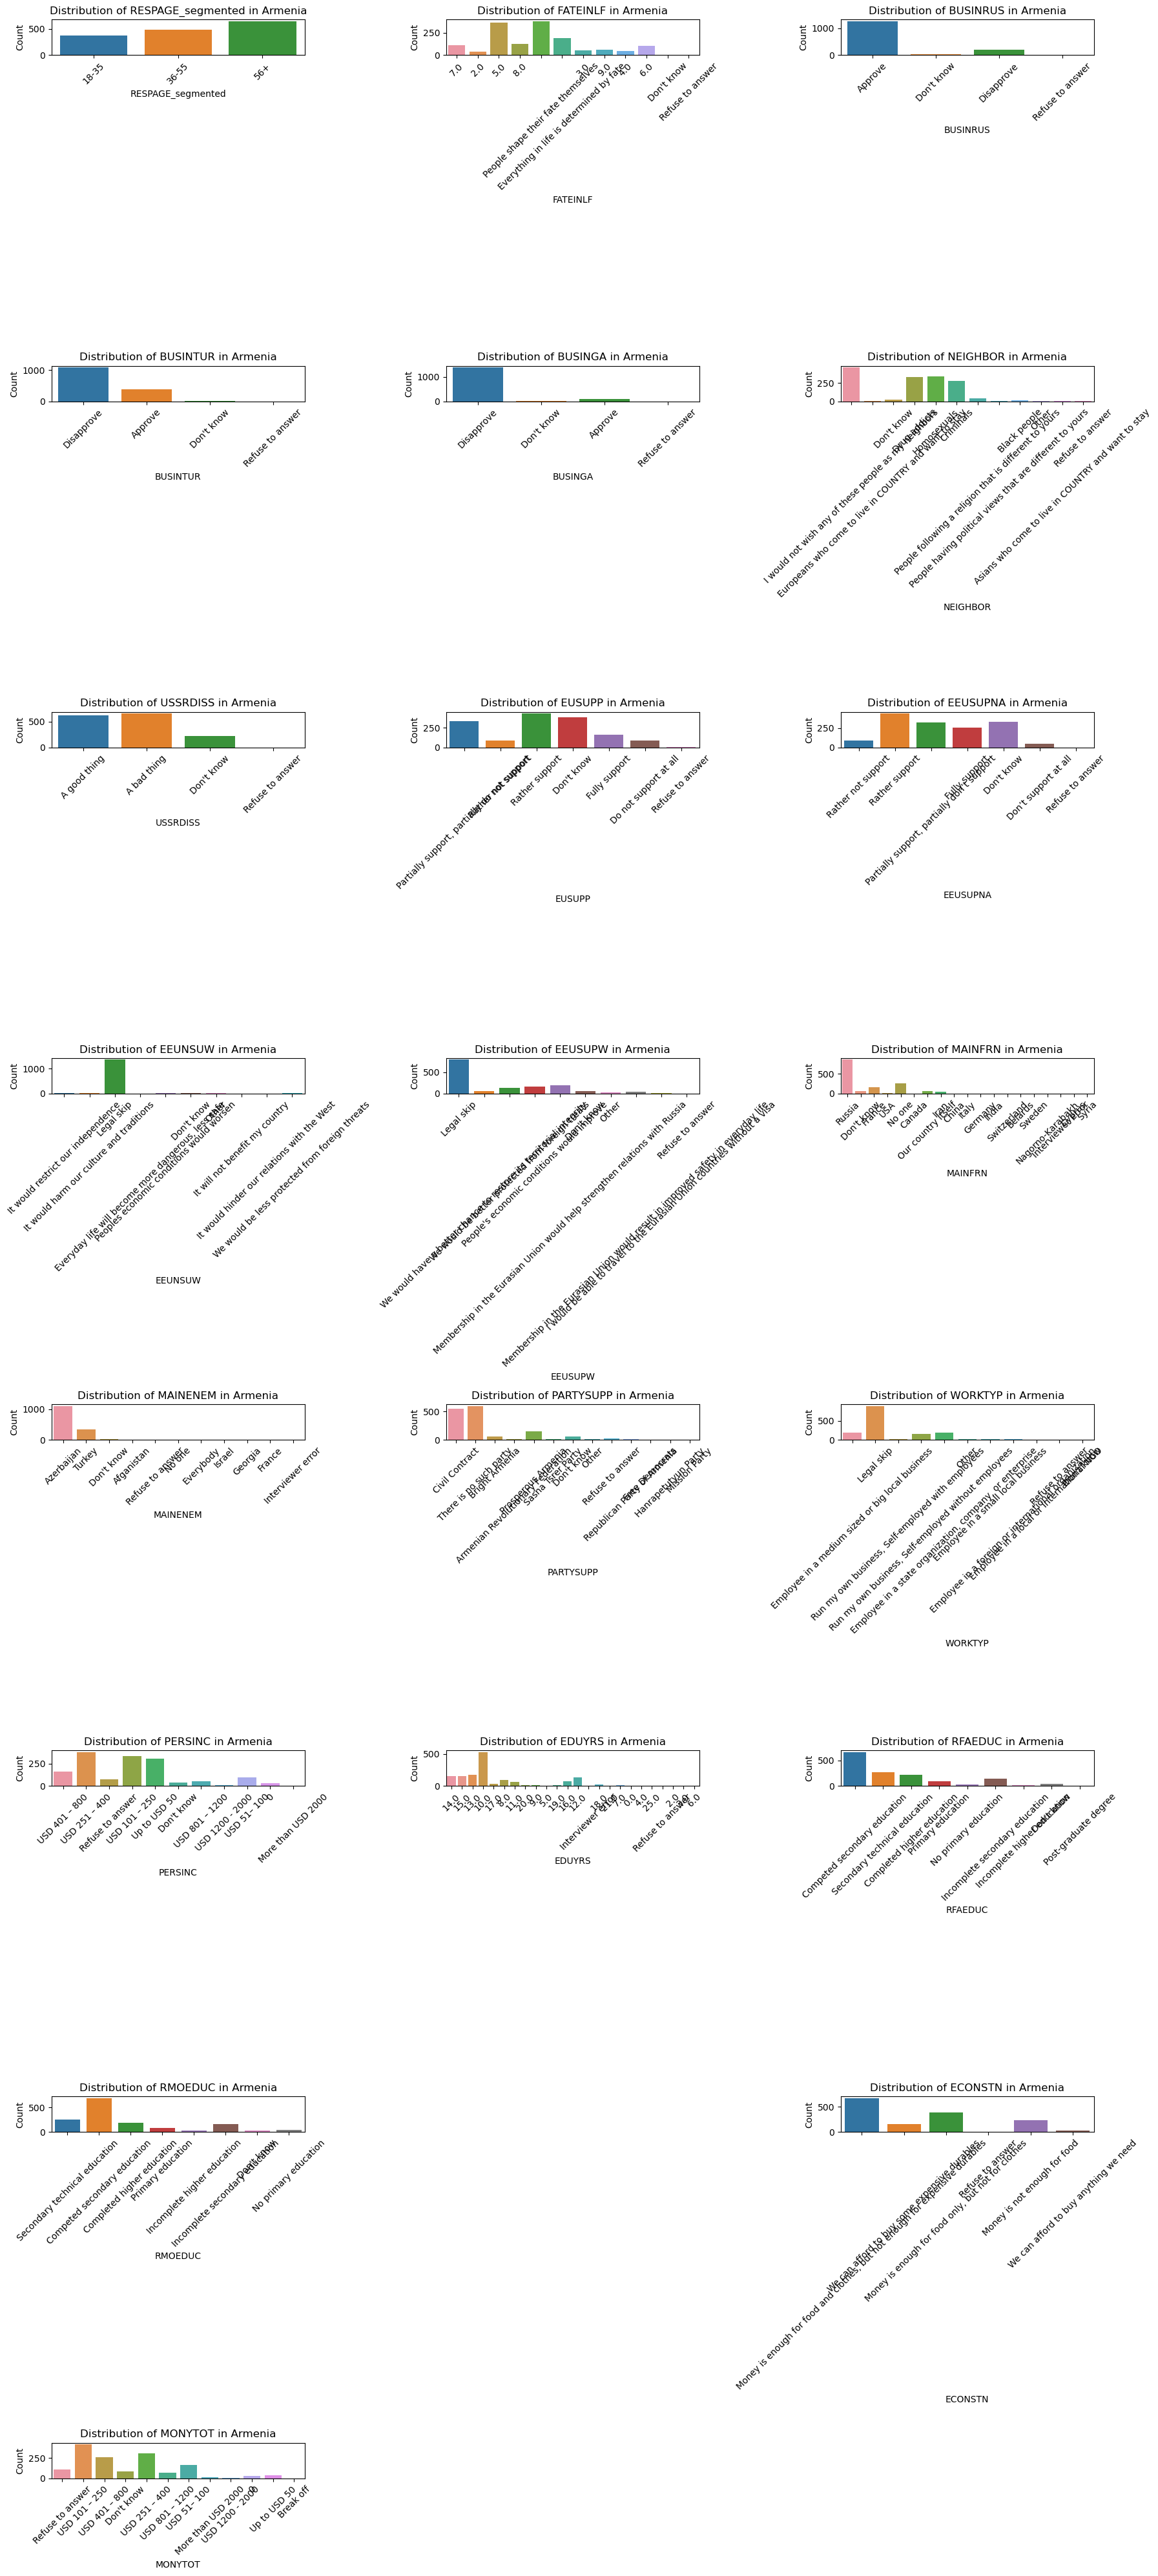

In [13]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Map COUNTRY values to their corresponding labels using the metadata
country_labels = meta.value_labels.get(meta.variable_to_label.get('COUNTRY'), {})
df['COUNTRY'] = df['COUNTRY'].map(country_labels)

# Filter the dataset to include only Armenia data
df_armenia = df[df['COUNTRY'] == 'Armenia'].copy()  # Use .copy() to avoid chained assignment

# Convert RESPAGE into age segments
df_armenia['RESPAGE_segmented'] = pd.cut(df_armenia['RESPAGE'], bins=[17, 35, 55, float('inf')], labels=['18-35', '36-55', '56+'])

# List of variables to plot, including the newly segmented RESPAGE
variables_to_plot = [
    'RESPAGE_segmented', 'FATEINLF','BUSINRUS','BUSINTUR', 'BUSINGA', 'NEIGHBOR', 
    'USSRDISS', 'EUSUPP', 'EEUSUPNA', 'EEUNSUW', 'EEUSUPW', 'MAINFRN', 
    'MAINENEM', 'PARTYSUPP', 'WORKTYP', 'PERSINC', 'EDUYRS', 'RFAEDUC', 
    'RMOEDUC', 'RELIMP', 'ECONSTN', 'MONYTOT'
]

# Set up the plot grid
num_plots = len(variables_to_plot)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each variable and create a plot
for i, variable in enumerate(variables_to_plot):
    # Copy the column to avoid modifying the original DataFrame
    df_armenia[variable + '_mapped'] = df_armenia[variable]
    
    # If the variable has value labels, selectively map them
    if variable in meta.variable_to_label:
        value_labels = meta.value_labels.get(meta.variable_to_label[variable], {})
        # Map only specific values that have a label, keep numeric values intact
        df_armenia[variable + '_mapped'] = df_armenia[variable].apply(lambda x: value_labels.get(x, x))
    
    # Debug: Check if the column has data before plotting
    print(f"Plotting variable: {variable}")
    print(df_armenia[variable + '_mapped'].value_counts())  # Debugging output
    
    # Plot the distribution of the variable without ordering
    if not df_armenia[variable + '_mapped'].isnull().all():  # Check if the column is not empty
        sns.countplot(data=df_armenia, x=variable + '_mapped', ax=axes[i])
        axes[i].set_title(f'Distribution of {variable} in Armenia')
        axes[i].set_xlabel(variable)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)  # Hide the plot if there's no data

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### All the label of the data can be access in folder Data file value_label_mapping

In [11]:
import pandas as pd
import pyreadstat

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# List of variables to explain
variables_to_explain = [
    'RESPAGE', 'FATEINLF','BUSINRUS','BUSINTUR', 'BUSINGA', 'NEIGHBOR', 
    'USSRDISS', 'EUSUPP', 'EEUSUPNA', 'EEUNSUW', 'EEUSUPW', 'MAINFRN', 
    'MAINENEM', 'PARTYSUPP', 'WORKTYP', 'PERSINC', 'EDUYRS', 'RFAEDUC', 
    'RMOEDUC', 'RELIMP', 'ECONSTN', 'MONYTOT'
]

# Prepare a list to store the value: label mappings
value_label_list = []

# Extract value: label mappings for each variable
for variable in variables_to_explain:
    if variable in meta.variable_to_label:
        value_labels = meta.value_labels.get(meta.variable_to_label[variable], {})
        for value, label in value_labels.items():
            value_label_list.append({'Variable': variable, 'Value': value, 'Label': label})

# Convert to DataFrame for easy viewing and export
value_label_df = pd.DataFrame(value_label_list)

# Display the DataFrame
print(value_label_df)

# save the result to a CSV file
value_label_df.to_csv('./data/value_label_mappings.csv', index=False)

     Variable  Value          Label
0     RESPAGE    1.0          18/35
1     RESPAGE    2.0          36/55
2     RESPAGE    3.0            56+
3    FATEINLF   -9.0      Break off
4    FATEINLF   -7.0     Legal skip
..        ...    ...            ...
366   MONYTOT    5.0  USD 251 – 400
367   MONYTOT    6.0  USD 101 – 250
368   MONYTOT    7.0    USD 51– 100
369   MONYTOT    8.0   Up to USD 50
370   MONYTOT    9.0              0

[371 rows x 3 columns]


# SECTION 1
#### Was the disolution of Soviet Union good or bad thing? USSRDISS


Answer can be seen from plotting from previous plotting

### Respondents who support nationalist or conservative parties are more likely to view the dissolution as a bad thing.


### Respondents with higher personal income are more likely to view the dissolution as a good thing.

### Respondents with more years of education are more likely to view the dissolution of the Soviet Union as a good thing.

### Older respondents are more likely to view the dissolution of the Soviet Union as a bad thing compared to younger respondents.

USSRDISS by Political Party (Mean of Binary):
PARTYSUPP
101.0    0.557562
102.0    1.000000
103.0    0.470588
104.0    0.414634
105.0    0.444444
106.0    0.352941
107.0    1.000000
108.0    0.500000
109.0    0.500000
301.0    0.422705
302.0    0.385093
303.0    0.307692
304.0    0.217822
305.0    0.449275
306.0    0.107143
307.0    0.666667
308.0    0.956522
309.0    0.375000
999.0    0.500000
Name: USSRDISS_binary, dtype: float64

Correlation between Personal Income and View on USSR Dissolution: -0.1321

Correlation between Education Years and View on USSR Dissolution: 0.1953

Correlation between Age and View on USSR Dissolution: -0.2738
Optimization terminated successfully.
         Current function value: 0.679152
         Iterations 4

Logistic Regression: Personal Income vs. View on USSR Dissolution
                           Logit Regression Results                           
Dep. Variable:        USSRDISS_binary   No. Observations:                 1637
Model:                   

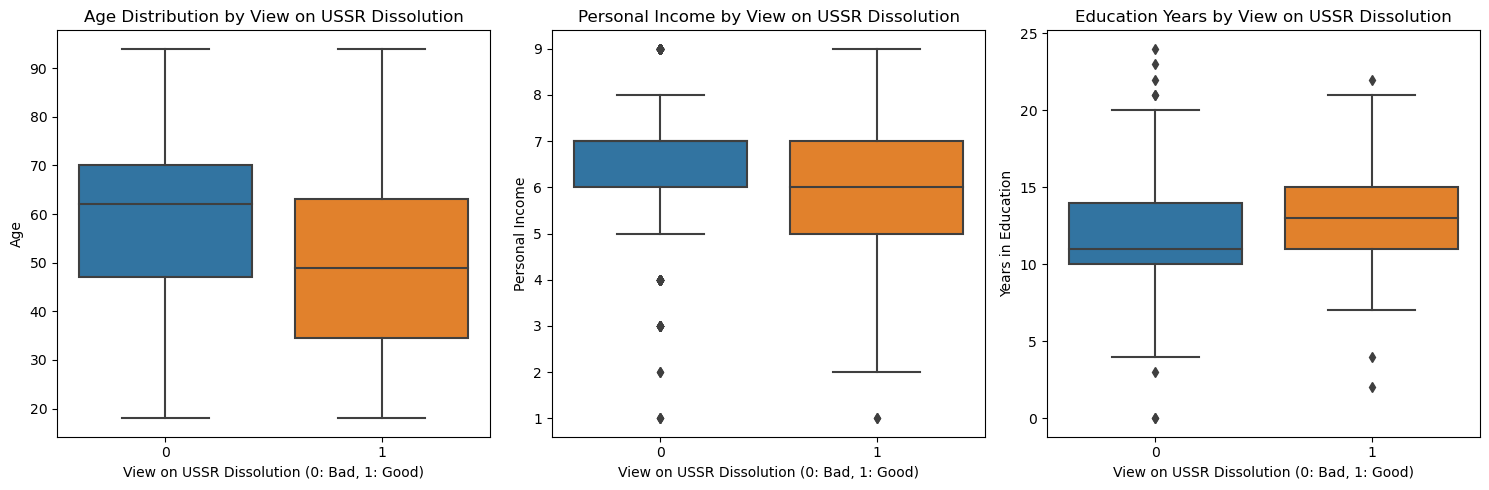

In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter out rows where any relevant variable is below 0 (indicating error or non-response)
relevant_vars = ['USSRDISS', 'PARTYSUPP', 'PERSINC', 'EDUYRS', 'RESPAGE']
df_filtered = df[(df[relevant_vars] >= 0).all(axis=1)].copy()  # Create a copy to avoid the warning

# Map USSRDISS to binary (1 = Good thing, 0 = Bad thing)
df_filtered['USSRDISS_binary'] = df_filtered['USSRDISS'].map({1.0: 1, 2.0: 0})

# 1. Nationalist/Conservative Parties vs. USSRDISS
# We assume nationalist/conservative parties are encoded in PARTYSUPP
parties = df_filtered.groupby('PARTYSUPP')['USSRDISS_binary'].mean()
print("USSRDISS by Political Party (Mean of Binary):")
print(parties)

# 2. Personal Income vs. USSRDISS
income_corr = df_filtered['PERSINC'].corr(df_filtered['USSRDISS_binary'])
print(f"\nCorrelation between Personal Income and View on USSR Dissolution: {income_corr:.4f}")

# 3. Education Years vs. USSRDISS
education_corr = df_filtered['EDUYRS'].corr(df_filtered['USSRDISS_binary'])
print(f"\nCorrelation between Education Years and View on USSR Dissolution: {education_corr:.4f}")

# 4. Age vs. USSRDISS
age_corr = df_filtered['RESPAGE'].corr(df_filtered['USSRDISS_binary'])
print(f"\nCorrelation between Age and View on USSR Dissolution: {age_corr:.4f}")

# Optional: Logistic regression to assess relationships

# Logistic regression for Personal Income
X_income = sm.add_constant(df_filtered['PERSINC'])
model_income = sm.Logit(df_filtered['USSRDISS_binary'], X_income).fit()
print("\nLogistic Regression: Personal Income vs. View on USSR Dissolution")
print(model_income.summary())

# Logistic regression for Education Years
X_edu = sm.add_constant(df_filtered['EDUYRS'])
model_edu = sm.Logit(df_filtered['USSRDISS_binary'], X_edu).fit()
print("\nLogistic Regression: Education Years vs. View on USSR Dissolution")
print(model_edu.summary())

# Logistic regression for Age
X_age = sm.add_constant(df_filtered['RESPAGE'])
model_age = sm.Logit(df_filtered['USSRDISS_binary'], X_age).fit()
print("\nLogistic Regression: Age vs. View on USSR Dissolution")
print(model_age.summary())

# Plot the distribution of opinions on USSR Dissolution by age, income, and education
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df_filtered['USSRDISS_binary'], y=df_filtered['RESPAGE'])
plt.title('Age Distribution by View on USSR Dissolution')
plt.xlabel('View on USSR Dissolution (0: Bad, 1: Good)')
plt.ylabel('Age')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_filtered['USSRDISS_binary'], y=df_filtered['PERSINC'])
plt.title('Personal Income by View on USSR Dissolution')
plt.xlabel('View on USSR Dissolution (0: Bad, 1: Good)')
plt.ylabel('Personal Income')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_filtered['USSRDISS_binary'], y=df_filtered['EDUYRS'])
plt.title('Education Years by View on USSR Dissolution')
plt.xlabel('View on USSR Dissolution (0: Bad, 1: Good)')
plt.ylabel('Years in Education')

plt.tight_layout()
plt.show()


### Respondents who support nationalist or conservative parties are more likely to view the dissolution as a bad thing. Rejected

### Respondents with higher personal income are more likely to view the dissolution as a good thing. Rejected

### Respondents with more years of education are more likely to view the dissolution of the Soviet Union as a good thing. Confirmied

### Older respondents are more likely to view the dissolution of the Soviet Union as a bad thing compared to younger respondents. Confirmid

# SECTION II WHO IS THE MAIN ENEMY OF ARMENIA? MAINENEM

#### 1. Respondents who support EU integration are more likely to perceive Russia as Armenia's main enemy.
 
#### 2. Respondents who consider Russia their main ally are less likely to view Russia as the enemy and more likely to perceive Turkey or Azerbaijan as Armenia's main enemy.
 
#### 3. Respondents who support nationalist or conservative parties are more likely to perceive Turkey as Armenia's main enemy.

####  4. Respondents with more years of education are more likely to perceive Russia as Armenia's main enemy.

EU Integration Support vs. Perception of Russia as Armenia's Main Enemy:
MAINENEM_mapped     False     True 
EUSUPP                             
1.0              0.836735  0.163265
2.0              0.870370  0.129630
3.0              0.669261  0.330739
4.0              0.604585  0.395415
5.0              0.408602  0.591398

Russia as Main Ally vs. Perception of Russia, Turkey, or Azerbaijan as Main Enemy:
MAINENEM_mapped   Armenia  Azerbaijan  Everybody  Foreigners   Georgia  \
MAINFRN                                                                  
False            0.011134    0.409919   0.002024    0.001012  0.001012   

MAINENEM_mapped      Iran  Muslim countries  Our country itself    Russia  \
MAINFRN                                                                     
False            0.003036          0.002024            0.001012  0.407895   

MAINENEM_mapped    Turkey       USA  Venezuela  
MAINFRN                                         
False            0.148785  0.011134   

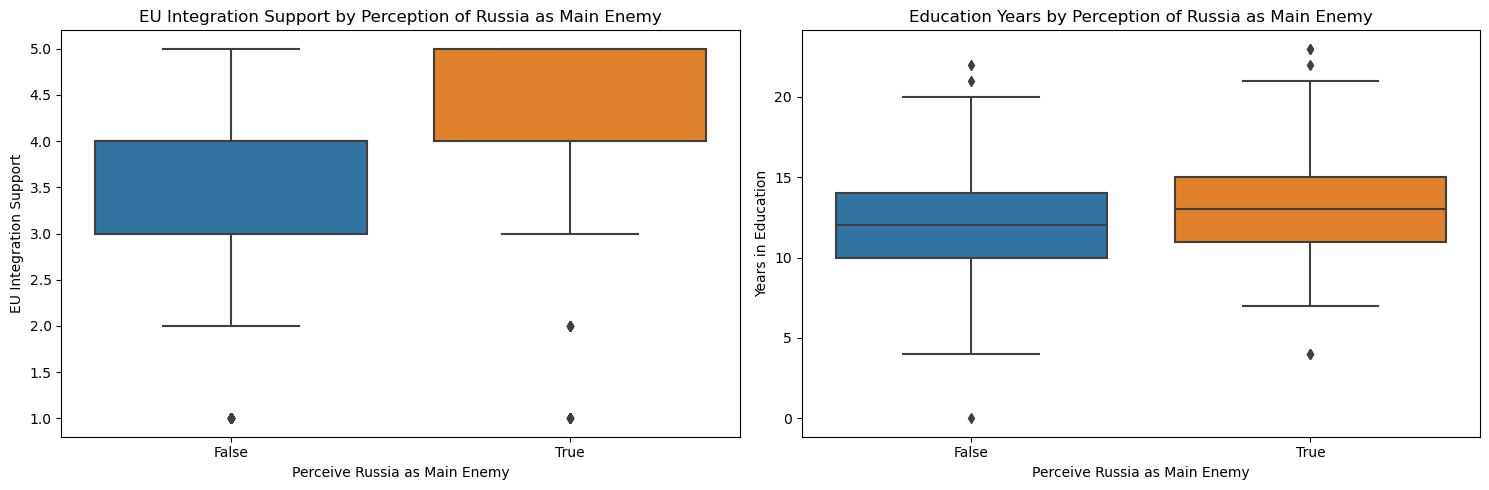

In [3]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Mapping MAINENEM values to countries or groups
mainenem_mapping = {
    1.0: 'Abkhazia', 2.0: 'Afghanistan', 3.0: 'Arabia', 4.0: 'Argentina', 5.0: 'Armenia',
    6.0: 'Australia', 7.0: 'Austria', 8.0: 'Azerbaijan', 9.0: 'Baltic countries',
    10.0: 'Belgium', 11.0: 'Belarus', 12.0: 'Canada', 13.0: 'Cyprus', 14.0: 'Czech republic',
    15.0: 'Denmark', 16.0: 'Eastern European Countries', 17.0: 'Egypt', 18.0: 'Estonia',
    19.0: 'EU', 20.0: 'Finland', 21.0: 'France', 22.0: 'Great Britain', 23.0: 'Germany',
    24.0: 'Greece', 25.0: 'Iceland', 26.0: 'India', 27.0: 'Iran', 28.0: 'Iraq', 29.0: 'Ireland',
    30.0: 'Israel', 31.0: 'Italy', 32.0: 'Japan', 33.0: 'Kazakhstan', 34.0: 'Korea',
    35.0: 'Kyrgyzstan', 36.0: 'Latvia', 37.0: 'Lithuania', 38.0: 'Luxembourg', 39.0: 'Many',
    40.0: 'Mexico', 41.0: 'Moldova', 42.0: 'Muslim countries', 43.0: 'Neighbouring countries',
    44.0: 'Netherlands', 45.0: 'Norway', 46.0: 'Ossetia', 47.0: 'Palestine', 48.0: 'Poland',
    49.0: 'Portugal', 50.0: 'Romania', 51.0: 'Russia', 52.0: 'Slovakia', 53.0: 'Spain',
    54.0: 'Sweden', 55.0: 'Switzerland', 56.0: 'Syria', 57.0: 'Turkey', 58.0: 'UAE',
    59.0: 'Ukraine', 60.0: 'Uruguay', 61.0: 'USA', 62.0: 'Uzbekistan', 63.0: 'Venezuela',
    64.0: 'China', 65.0: 'Nagorno-Karabakh', 66.0: 'Sweden', 67.0: 'Georgia', 81.0: 'Everybody',
    82.0: 'Except Russia', 83.0: 'Foreigners', 84.0: 'Our country itself', 85.0: 'Globalism',
    86.0: 'Local government'
}

# Filter out rows where any relevant variable is below 0 (indicating error or non-response)
relevant_vars = ['MAINENEM', 'EUSUPP', 'MAINFRN', 'PARTYSUPP', 'EDUYRS']
df_filtered = df[(df[relevant_vars] >= 0).all(axis=1)].copy()

# Map MAINENEM to specific countries or groups
df_filtered['MAINENEM_mapped'] = df_filtered['MAINENEM'].map(mainenem_mapping)

# Section II Analysis

# 1. EU Integration Support vs. Perception of Russia as the Main Enemy
eu_russia_enemy = pd.crosstab(df_filtered['EUSUPP'], df_filtered['MAINENEM_mapped'] == 'Russia', normalize='index')
print("EU Integration Support vs. Perception of Russia as Armenia's Main Enemy:")
print(eu_russia_enemy)

# 2. Russia as Main Ally vs. Perception of Russia, Turkey, or Azerbaijan as Main Enemy
russia_ally_enemy = pd.crosstab(df_filtered['MAINFRN'] == 'Russia', df_filtered['MAINENEM_mapped'], normalize='index')
print("\nRussia as Main Ally vs. Perception of Russia, Turkey, or Azerbaijan as Main Enemy:")
print(russia_ally_enemy)

# 3. Nationalist/Conservative Parties vs. Perception of Turkey as Main Enemy
turkey_enemy_party = pd.crosstab(df_filtered['PARTYSUPP'], df_filtered['MAINENEM_mapped'] == 'Turkey', normalize='index')
print("\nNationalist/Conservative Parties vs. Perception of Turkey as Armenia's Main Enemy:")
print(turkey_enemy_party)

# 4. Education Years vs. Perception of Russia as Main Enemy
education_russia_enemy_corr = df_filtered['EDUYRS'].corr(df_filtered['MAINENEM_mapped'] == 'Russia')
print(f"\nCorrelation between Education Years and Perception of Russia as Armenia's Main Enemy: {education_russia_enemy_corr:.4f}")

# Optional: Logistic regression to assess relationships

# Logistic regression for EU Support
X_eu = sm.add_constant(df_filtered['EUSUPP'])
model_eu = sm.Logit(df_filtered['MAINENEM_mapped'] == 'Russia', X_eu).fit()
print("\nLogistic Regression: EU Integration Support vs. Perception of Russia as Main Enemy")
print(model_eu.summary())

# Logistic regression for Education Years
X_edu = sm.add_constant(df_filtered['EDUYRS'])
model_edu = sm.Logit(df_filtered['MAINENEM_mapped'] == 'Russia', X_edu).fit()
print("\nLogistic Regression: Education Years vs. Perception of Russia as Main Enemy")
print(model_edu.summary())

# Plotting relationships
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_filtered['MAINENEM_mapped'] == 'Russia', y=df_filtered['EUSUPP'])
plt.title('EU Integration Support by Perception of Russia as Main Enemy')
plt.xlabel('Perceive Russia as Main Enemy')
plt.ylabel('EU Integration Support')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['MAINENEM_mapped'] == 'Russia', y=df_filtered['EDUYRS'])
plt.title('Education Years by Perception of Russia as Main Enemy')
plt.xlabel('Perceive Russia as Main Enemy')
plt.ylabel('Years in Education')

plt.tight_layout()
plt.show()


#### 1. Respondents who support EU integration are more likely to perceive Russia as Armenia's main enemy. Confirmied
 
#### 2. Respondents who consider Russia their main ally are more likely to perceive Turkey or Azerbaijan as Armenia's main enemy. confirmid for Azerbajian. Rejected for Turkey
 
#### 3. Respondents who support nationalist or conservative parties are more likely to perceive Turkey as Armenia's main enemy. Rejected

####  4. Respondents with more years of education are more likely to perceive Russia as Armenia's main enemy. Rejected

# SECTION III WHO IS THE MAIN FRIENDS OF ARMENIA? MAINFRN

#### 1.  Older respondents are more likely to perceive Russia as Armenia's main friend compared to younger respondents.

#### 2.  Respondents from higher-income families are more likely to perceive the European Union (EU) or the United States as Armenia's main friend.

#### 3.  Respondents who perceive Turkey or Azerbaijan as Armenia's main enemy are more likely to perceive Russia as Armenia's main friend.

Correlation between Age and Perception of Russia as Armenia's Main Friend: 0.0071

Income vs. Perception of EU/USA as Armenia's Main Friend:
MAINFRN_mapped     False     True 
PERSINC                           
1.0             0.750000  0.250000
2.0             0.500000  0.500000
3.0             0.933333  0.066667
4.0             0.870130  0.129870
5.0             0.898551  0.101449
6.0             0.832184  0.167816
7.0             0.593496  0.406504
8.0             0.881620  0.118380
9.0             0.506329  0.493671

Perception of Turkey/Azerbaijan as Enemy vs. Perception of Russia as Armenia's Main Friend:
MAINFRN_mapped      False     True 
MAINENEM_mapped                    
False            0.977901  0.022099
True             0.282511  0.717489
Optimization terminated successfully.
         Current function value: 0.686774
         Iterations 4

Logistic Regression: Age vs. Perception of Russia as Main Friend
                           Logit Regression Results                  

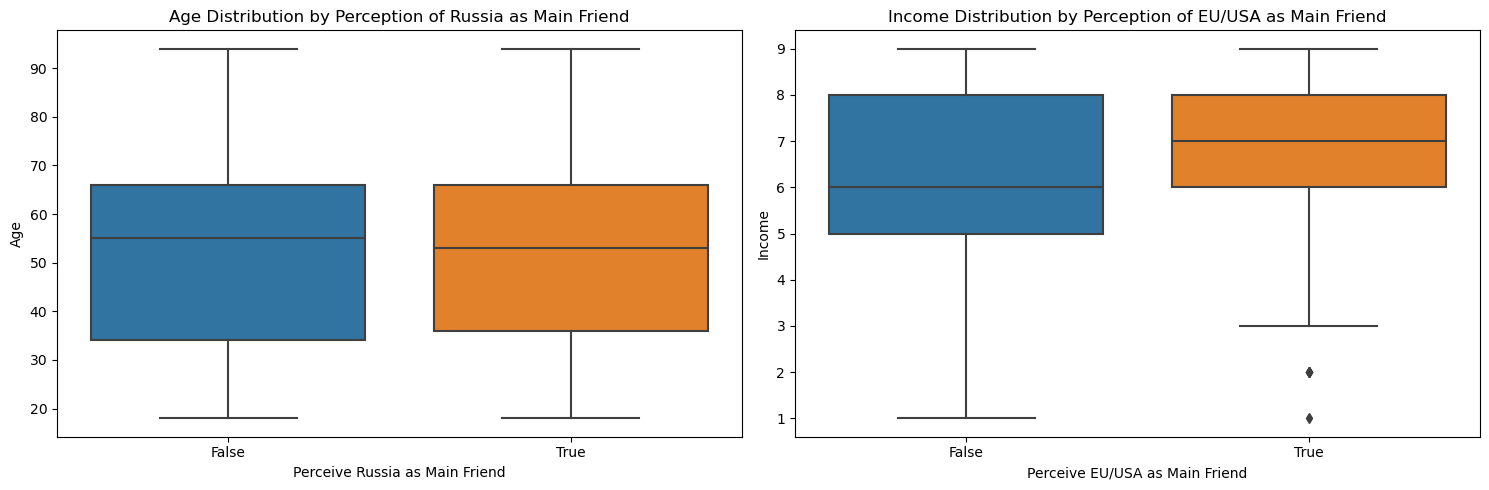

In [5]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Mapping MAINFRN and MAINENEM values to countries or groups
mainfrn_mapping = {
    1.0: 'Abkhazia', 2.0: 'Afghanistan', 3.0: 'Arabia', 4.0: 'Argentina', 5.0: 'Armenia',
    6.0: 'Australia', 7.0: 'Austria', 8.0: 'Azerbaijan', 9.0: 'Baltic countries',
    10.0: 'Belgium', 11.0: 'Belarus', 12.0: 'Canada', 13.0: 'Cyprus', 14.0: 'Czech republic',
    15.0: 'Denmark', 16.0: 'Eastern European Countries', 17.0: 'Egypt', 18.0: 'Estonia',
    19.0: 'EU', 20.0: 'Finland', 21.0: 'France', 22.0: 'Great Britain', 23.0: 'Germany',
    24.0: 'Greece', 25.0: 'Iceland', 26.0: 'India', 27.0: 'Iran', 28.0: 'Iraq', 29.0: 'Ireland',
    30.0: 'Israel', 31.0: 'Italy', 32.0: 'Japan', 33.0: 'Kazakhstan', 34.0: 'Korea',
    35.0: 'Kyrgyzstan', 36.0: 'Latvia', 37.0: 'Lithuania', 38.0: 'Luxembourg', 39.0: 'Many',
    40.0: 'Mexico', 41.0: 'Moldova', 42.0: 'Muslim countries', 43.0: 'Neighbouring countries',
    44.0: 'Netherlands', 45.0: 'Norway', 46.0: 'Ossetia', 47.0: 'Palestine', 48.0: 'Poland',
    49.0: 'Portugal', 50.0: 'Romania', 51.0: 'Russia', 52.0: 'Slovakia', 53.0: 'Spain',
    54.0: 'Sweden', 55.0: 'Switzerland', 56.0: 'Syria', 57.0: 'Turkey', 58.0: 'UAE',
    59.0: 'Ukraine', 60.0: 'Uruguay', 61.0: 'USA', 62.0: 'Uzbekistan', 63.0: 'Venezuela',
    64.0: 'China', 65.0: 'Nagorno-Karabakh', 66.0: 'Sweden', 67.0: 'Georgia', 81.0: 'Everybody',
    82.0: 'Except Russia', 83.0: 'Foreigners', 84.0: 'Our country itself', 85.0: 'Globalism',
    86.0: 'Local government'
}

mainenem_mapping = {
    8.0: 'Azerbaijan', 51.0: 'Russia', 57.0: 'Turkey'
}

# Filter out rows where any relevant variable is below 0 (indicating error or non-response)
relevant_vars = ['MAINFRN', 'RESPAGE', 'PERSINC', 'MAINENEM']
df_filtered = df[(df[relevant_vars] >= 0).all(axis=1)].copy()

# Map MAINFRN and MAINENEM to specific countries or groups
df_filtered['MAINFRN_mapped'] = df_filtered['MAINFRN'].map(mainfrn_mapping)
df_filtered['MAINENEM_mapped'] = df_filtered['MAINENEM'].map(mainenem_mapping)

# Section III Analysis

# 1. Older Respondents vs. Perception of Russia as Armenia's Main Friend
age_russia_friend_corr = df_filtered['RESPAGE'].corr(df_filtered['MAINFRN_mapped'] == 'Russia')
print(f"Correlation between Age and Perception of Russia as Armenia's Main Friend: {age_russia_friend_corr:.4f}")

# 2. Higher-Income Families vs. Perception of EU/USA as Armenia's Main Friend
high_income_friend = pd.crosstab(df_filtered['PERSINC'], df_filtered['MAINFRN_mapped'].isin(['EU', 'USA']), normalize='index')
print("\nIncome vs. Perception of EU/USA as Armenia's Main Friend:")
print(high_income_friend)

# 3. Perception of Turkey/Azerbaijan as Enemy vs. Perception of Russia as Friend
enemy_friend_crosstab = pd.crosstab(df_filtered['MAINENEM_mapped'].isin(['Turkey', 'Azerbaijan']), df_filtered['MAINFRN_mapped'] == 'Russia', normalize='index')
print("\nPerception of Turkey/Azerbaijan as Enemy vs. Perception of Russia as Armenia's Main Friend:")
print(enemy_friend_crosstab)

# Optional: Logistic regression to assess relationships

# Logistic regression for Age
X_age = sm.add_constant(df_filtered['RESPAGE'])
model_age = sm.Logit(df_filtered['MAINFRN_mapped'] == 'Russia', X_age).fit()
print("\nLogistic Regression: Age vs. Perception of Russia as Main Friend")
print(model_age.summary())

# Logistic regression for Income (perceiving EU/USA as Armenia's main friend)
X_income = sm.add_constant(df_filtered['PERSINC'])
model_income = sm.Logit(df_filtered['MAINFRN_mapped'].isin(['EU', 'USA']), X_income).fit()
print("\nLogistic Regression: Income vs. Perception of EU/USA as Main Friend")
print(model_income.summary())

# Plotting relationships
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_filtered['MAINFRN_mapped'] == 'Russia', y=df_filtered['RESPAGE'])
plt.title('Age Distribution by Perception of Russia as Main Friend')
plt.xlabel('Perceive Russia as Main Friend')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['MAINFRN_mapped'].isin(['EU', 'USA']), y=df_filtered['PERSINC'])
plt.title('Income Distribution by Perception of EU/USA as Main Friend')
plt.xlabel('Perceive EU/USA as Main Friend')
plt.ylabel('Income')

plt.tight_layout()
plt.show()


#### 1.  Older respondents are more likely to perceive Russia as Armenia's main friend compared to younger respondents. Rejected

#### 2.  Respondents from higher-income families are more likely to perceive the European Union (EU) or the United States as Armenia's main friend. Confirmed

#### 3.  Respondents who perceive Turkey or Azerbaijan as Armenia's main enemy are more likely to perceive Russia as Armenia's main friend. Confirmed

# SECTION IV  WHAT IS YOUR OPINION ABOUT EU?

#### Younger respondents are more likely to have a positive opinion about the EU compared to older respondents. EUSUPP

#### Respondents who support liberal or pro-European political parties are more likely to have a positive opinion of the EU.

#### Respondents with more years of education are more likely to have a positive opinion of the EU.

#### Respondents who consider religion very important may have a more skeptical opinion of the EU, especially if they perceive it as secular or opposed to traditional values.

Correlation between Age and Positive Opinion of the EU: -0.1382

Support for Liberal/Pro-European Parties vs. Positive Opinion of the EU:
Empty DataFrame
Columns: []
Index: []

Correlation between Education Years and Positive Opinion of the EU: 0.1244

Correlation between Religious Importance and Opinion of the EU: -0.0603
Optimization terminated successfully.
         Current function value: 0.649858
         Iterations 5

Logistic Regression: Age vs. Positive Opinion of the EU
                           Logit Regression Results                           
Dep. Variable:          EUSUPP_binary   No. Observations:                 1003
Model:                          Logit   Df Residuals:                     1001
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                 0.01048
Time:                        16:15:02   Log-Likelihood:                -651.81
converged:                       True   LL

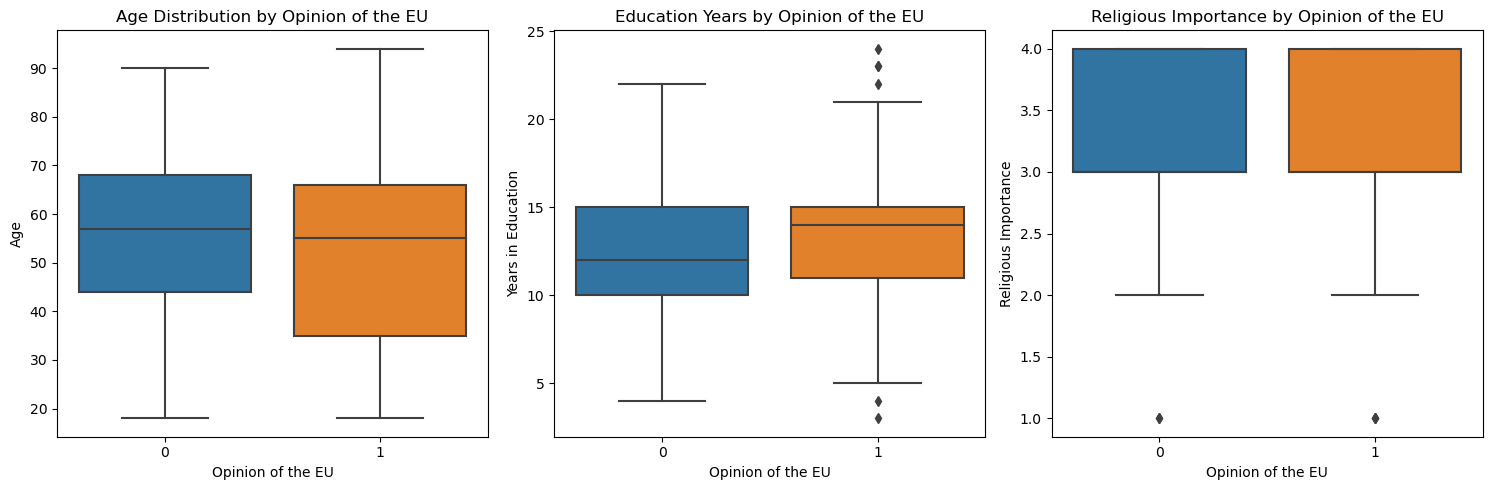

In [10]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter out rows where any relevant variable is below 0 (indicating error or non-response)
relevant_vars = ['EUSUPP', 'RESPAGE', 'PARTYSUPP', 'EDUYRS', 'RELIMP']
df_filtered = df[(df[relevant_vars] >= 0).all(axis=1)].copy()

# Convert EUSUPP into a binary variable for logistic regression
# Assuming EUSUPP is on a scale, we convert to binary (1 for positive, 0 for less positive)
df_filtered['EUSUPP_binary'] = df_filtered['EUSUPP'].apply(lambda x: 1 if x >= 4 else 0)

# Map PARTYSUPP to identify liberal or pro-European parties
# Ensure the mapping corresponds to your actual data
liberal_pro_european_parties = {
    1.0: 'Liberal Party',  # Example mapping
    2.0: 'Pro-European Party',  # Example mapping
    # Add actual mappings for your dataset
}

df_filtered['PARTYSUPP_mapped'] = df_filtered['PARTYSUPP'].map(liberal_pro_european_parties)

# Section IV Analysis

# 1. Younger Respondents vs. Positive Opinion of the EU
age_eu_support_corr = df_filtered['RESPAGE'].corr(df_filtered['EUSUPP'])
print(f"Correlation between Age and Positive Opinion of the EU: {age_eu_support_corr:.4f}")

# 2. Support for Liberal/Pro-European Parties vs. Positive Opinion of the EU
liberal_party_eu_support = pd.crosstab(df_filtered['PARTYSUPP_mapped'], df_filtered['EUSUPP_binary'], normalize='index')
print("\nSupport for Liberal/Pro-European Parties vs. Positive Opinion of the EU:")
print(liberal_party_eu_support)

# 3. Education Years vs. Positive Opinion of the EU
education_eu_support_corr = df_filtered['EDUYRS'].corr(df_filtered['EUSUPP'])
print(f"\nCorrelation between Education Years and Positive Opinion of the EU: {education_eu_support_corr:.4f}")

# 4. Religious Importance vs. Skeptical Opinion of the EU
religion_eu_support_corr = df_filtered['RELIMP'].corr(df_filtered['EUSUPP'])
print(f"\nCorrelation between Religious Importance and Opinion of the EU: {religion_eu_support_corr:.4f}")

# Logistic regression for Age
X_age = sm.add_constant(df_filtered['RESPAGE'])
model_age = sm.Logit(df_filtered['EUSUPP_binary'], X_age).fit()
print("\nLogistic Regression: Age vs. Positive Opinion of the EU")
print(model_age.summary())

# Logistic regression for Education Years
X_edu = sm.add_constant(df_filtered['EDUYRS'])
model_edu = sm.Logit(df_filtered['EUSUPP_binary'], X_edu).fit()
print("\nLogistic Regression: Education Years vs. Positive Opinion of the EU")
print(model_edu.summary())

# Logistic regression for Religious Importance
X_religion = sm.add_constant(df_filtered['RELIMP'])
model_religion = sm.Logit(df_filtered['EUSUPP_binary'], X_religion).fit()
print("\nLogistic Regression: Religious Importance vs. Opinion of the EU")
print(model_religion.summary())

# Plotting relationships
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.boxplot(x=df_filtered['EUSUPP_binary'], y=df_filtered['RESPAGE'])
plt.title('Age Distribution by Opinion of the EU')
plt.xlabel('Opinion of the EU')
plt.ylabel('Age')

plt.subplot(1, 4, 2)
sns.boxplot(x=df_filtered['EUSUPP_binary'], y=df_filtered['EDUYRS'])
plt.title('Education Years by Opinion of the EU')
plt.xlabel('Opinion of the EU')
plt.ylabel('Years in Education')

plt.subplot(1, 4, 3)
sns.boxplot(x=df_filtered['EUSUPP_binary'], y=df_filtered['RELIMP'])
plt.title('Religious Importance by Opinion of the EU')
plt.xlabel('Opinion of the EU')
plt.ylabel('Religious Importance')

plt.tight_layout()
plt.show()


#### Younger respondents are more likely to have a positive opinion about the EU compared to older respondents. EUSUPP Rejected

#### Respondents who support liberal or pro-European political parties are more likely to have a positive opinion of the EU.

#### Respondents with more years of education are more likely to have a positive opinion of the EU. Rejected

#### Respondents who consider religion very important may have a more skeptical opinion of the EU, especially if they perceive it as secular or opposed to traditional values. Rejected

Correlation between Age and Positive Opinion of the EU: -0.1382

Support for Different Parties vs. Positive Opinion of the EU:
EUSUPP_binary                                   0         1
PARTYSUPP_mapped                                           
Alliance of Patriots of Georgia          0.520000  0.480000
Democratic Movement – United Georgia     0.393939  0.606061
Free Georgia                             0.384615  0.615385
Georgian Dream                           0.368778  0.631222
Labor Party                              0.342466  0.657534
Movement for Liberty - European Georgia  0.297872  0.702128
New Political Center – Girchi            0.173913  0.826087
Other                                    0.450000  0.550000
Political Platform New Georgia           0.311111  0.688889
United National Movement                 0.337500  0.662500

Correlation between Education Years and Positive Opinion of the EU: 0.1244

Correlation between Religious Importance and Opinion of the EU: -0.0603
Opti

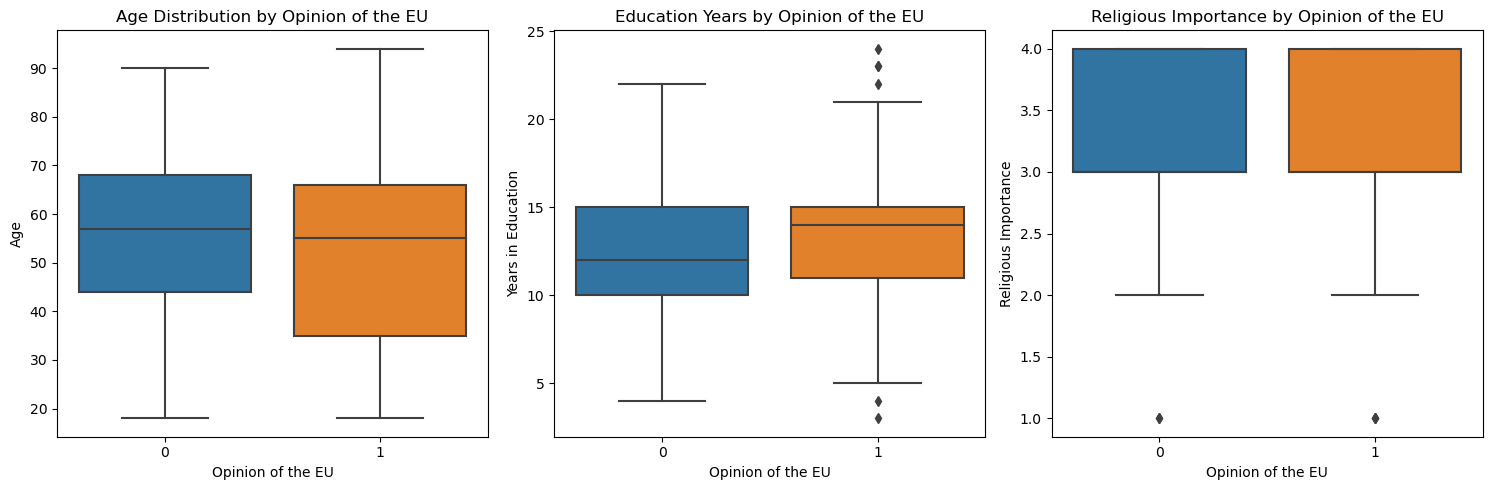

In [17]:

import pandas as pd
import pyreadstat
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter out rows where any relevant variable is below 0 (indicating error or non-response)
relevant_vars = ['EUSUPP', 'RESPAGE', 'PARTYSUPP', 'EDUYRS', 'RELIMP']
df_filtered = df[(df[relevant_vars] >= 0).all(axis=1)].copy()

# Convert EUSUPP into a binary variable for logistic regression
# Assuming EUSUPP is on a scale, we convert to binary (1 for positive, 0 for less positive)
df_filtered['EUSUPP_binary'] = df_filtered['EUSUPP'].apply(lambda x: 1 if x >= 4 else 0)

# Map PARTYSUPP to identify all parties
# Use metadata to map party codes to their names
party_labels = meta.value_labels.get(meta.variable_to_label.get('PARTYSUPP', ''), {})
df_filtered['PARTYSUPP_mapped'] = df_filtered['PARTYSUPP'].map(party_labels)

# Section IV Analysis

# 1. Younger Respondents vs. Positive Opinion of the EU
age_eu_support_corr = df_filtered['RESPAGE'].corr(df_filtered['EUSUPP'])
print(f"Correlation between Age and Positive Opinion of the EU: {age_eu_support_corr:.4f}")

# 2. Support for Different Parties vs. Positive Opinion of the EU
party_eu_support = pd.crosstab(df_filtered['PARTYSUPP_mapped'], df_filtered['EUSUPP_binary'], normalize='index')
print("\nSupport for Different Parties vs. Positive Opinion of the EU:")
print(party_eu_support)

# 3. Education Years vs. Positive Opinion of the EU
education_eu_support_corr = df_filtered['EDUYRS'].corr(df_filtered['EUSUPP'])
print(f"\nCorrelation between Education Years and Positive Opinion of the EU: {education_eu_support_corr:.4f}")

# 4. Religious Importance vs. Opinion of the EU
religion_eu_support_corr = df_filtered['RELIMP'].corr(df_filtered['EUSUPP'])
print(f"\nCorrelation between Religious Importance and Opinion of the EU: {religion_eu_support_corr:.4f}")

# Logistic regression for Age
X_age = sm.add_constant(df_filtered['RESPAGE'])
model_age = sm.Logit(df_filtered['EUSUPP_binary'], X_age).fit()
print("\nLogistic Regression: Age vs. Positive Opinion of the EU")
print(model_age.summary())

# Logistic regression for Education Years
X_edu = sm.add_constant(df_filtered['EDUYRS'])
model_edu = sm.Logit(df_filtered['EUSUPP_binary'], X_edu).fit()
print("\nLogistic Regression: Education Years vs. Positive Opinion of the EU")
print(model_edu.summary())

# Logistic regression for Religious Importance
X_religion = sm.add_constant(df_filtered['RELIMP'])
model_religion = sm.Logit(df_filtered['EUSUPP_binary'], X_religion).fit()
print("\nLogistic Regression: Religious Importance vs. Opinion of the EU")
print(model_religion.summary())

# Plotting relationships
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.boxplot(x=df_filtered['EUSUPP_binary'], y=df_filtered['RESPAGE'])
plt.title('Age Distribution by Opinion of the EU')
plt.xlabel('Opinion of the EU')
plt.ylabel('Age')

plt.subplot(1, 4, 2)
sns.boxplot(x=df_filtered['EUSUPP_binary'], y=df_filtered['EDUYRS'])
plt.title('Education Years by Opinion of the EU')
plt.xlabel('Opinion of the EU')
plt.ylabel('Years in Education')

plt.subplot(1, 4, 3)
sns.boxplot(x=df_filtered['EUSUPP_binary'], y=df_filtered['RELIMP'])
plt.title('Religious Importance by Opinion of the EU')
plt.xlabel('Opinion of the EU')
plt.ylabel('Religious Importance')

plt.tight_layout()
plt.show()



Russia as Main Ally vs. Perception of Russia, Turkey, or Azerbaijan as Main Enemy:
MAINENEM_mapped         0         1
MAINFRN                            
0                0.043155  0.956845
1                0.014286  0.985714
Optimization terminated successfully.
         Current function value: 0.134424
         Iterations 8

Logistic Regression: Russia as Main Ally vs. Perception of Russia, Turkey, or Azerbaijan as Main Enemy
                           Logit Regression Results                           
Dep. Variable:        MAINENEM_mapped   No. Observations:                 1162
Model:                          Logit   Df Residuals:                     1160
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                 0.02688
Time:                        16:58:12   Log-Likelihood:                -156.20
converged:                       True   LL-Null:                       -160.51
Covariance Ty

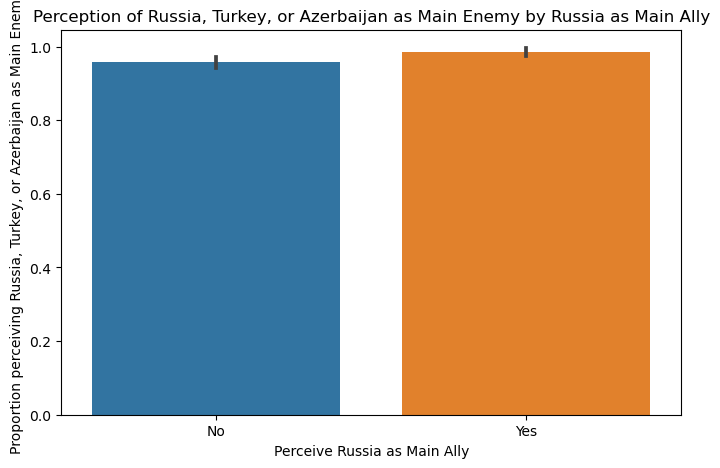

In [15]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Mapping MAINENEM values to countries or groups
mainenem_mapping = {
    1.0: 'Abkhazia', 2.0: 'Afghanistan', 3.0: 'Arabia', 4.0: 'Argentina', 5.0: 'Armenia',
    6.0: 'Australia', 7.0: 'Austria', 8.0: 'Azerbaijan', 9.0: 'Baltic countries',
    10.0: 'Belgium', 11.0: 'Belarus', 12.0: 'Canada', 13.0: 'Cyprus', 14.0: 'Czech republic',
    15.0: 'Denmark', 16.0: 'Eastern European Countries', 17.0: 'Egypt', 18.0: 'Estonia',
    19.0: 'EU', 20.0: 'Finland', 21.0: 'France', 22.0: 'Great Britain', 23.0: 'Germany',
    24.0: 'Greece', 25.0: 'Iceland', 26.0: 'India', 27.0: 'Iran', 28.0: 'Iraq', 29.0: 'Ireland',
    30.0: 'Israel', 31.0: 'Italy', 32.0: 'Japan', 33.0: 'Kazakhstan', 34.0: 'Korea',
    35.0: 'Kyrgyzstan', 36.0: 'Latvia', 37.0: 'Lithuania', 38.0: 'Luxembourg', 39.0: 'Many',
    40.0: 'Mexico', 41.0: 'Moldova', 42.0: 'Muslim countries', 43.0: 'Neighbouring countries',
    44.0: 'Netherlands', 45.0: 'Norway', 46.0: 'Ossetia', 47.0: 'Palestine', 48.0: 'Poland',
    49.0: 'Portugal', 50.0: 'Romania', 51.0: 'Russia', 52.0: 'Slovakia', 53.0: 'Spain',
    54.0: 'Sweden', 55.0: 'Switzerland', 56.0: 'Syria', 57.0: 'Turkey', 58.0: 'UAE',
    59.0: 'Ukraine', 60.0: 'Uruguay', 61.0: 'USA', 62.0: 'Uzbekistan', 63.0: 'Venezuela',
    64.0: 'China', 65.0: 'Nagorno-Karabakh', 66.0: 'Sweden', 67.0: 'Georgia', 81.0: 'Everybody',
    82.0: 'Except Russia', 83.0: 'Foreigners', 84.0: 'Our country itself', 85.0: 'Globalism',
    86.0: 'Local government'
}

# Filter out rows where any relevant variable is below 0 (indicating error or non-response)
relevant_vars = ['MAINENEM', 'MAINFRN', 'PARTYSUPP', 'EDUYRS']
df_filtered = df[(df[relevant_vars] >= 0).all(axis=1)].copy()

# Map MAINENEM to specific countries or groups
df_filtered['MAINENEM_mapped'] = df_filtered['MAINENEM'].map(mainenem_mapping)

# Section II Analysis

# 2. Russia as Main Ally vs. Perception of Russia, Turkey, or Azerbaijan as Main Enemy
# We consider "Russia", "Turkey", and "Azerbaijan" as main enemies.
enemy_countries = ['Russia', 'Turkey', 'Azerbaijan']
russia_ally_bool = (df_filtered['MAINFRN'] == 51.0).astype(int)
enemy_bool = df_filtered['MAINENEM_mapped'].isin(enemy_countries).astype(int)

russia_ally_enemy = pd.crosstab(russia_ally_bool, enemy_bool, normalize='index')
print("\nRussia as Main Ally vs. Perception of Russia, Turkey, or Azerbaijan as Main Enemy:")
print(russia_ally_enemy)

# Optional: Logistic regression to assess the relationship

# Logistic regression for Russia as Main Ally vs. Perception of these countries as enemies
X_russia_ally = sm.add_constant(russia_ally_bool)
model_russia_ally = sm.Logit(enemy_bool, X_russia_ally).fit()
print("\nLogistic Regression: Russia as Main Ally vs. Perception of Russia, Turkey, or Azerbaijan as Main Enemy")
print(model_russia_ally.summary())

# Plotting relationships
plt.figure(figsize=(8, 5))
sns.barplot(x=russia_ally_bool, y=enemy_bool)
plt.title('Perception of Russia, Turkey, or Azerbaijan as Main Enemy by Russia as Main Ally')
plt.xlabel('Perceive Russia as Main Ally')
plt.ylabel('Proportion perceiving Russia, Turkey, or Azerbaijan as Main Enemy')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



Russia as Main Ally vs. Perception of Azerbaijan as Main Enemy:
MAINENEM_mapped         0         1
MAINFRN                            
0                0.772321  0.227679
1                0.253061  0.746939
Optimization terminated successfully.
         Current function value: 0.548777
         Iterations 5

Logistic Regression: Russia as Main Ally vs. Perception of Azerbaijan as Main Enemy
                           Logit Regression Results                           
Dep. Variable:        MAINENEM_mapped   No. Observations:                 1162
Model:                          Logit   Df Residuals:                     1160
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                  0.2017
Time:                        17:01:18   Log-Likelihood:                -637.68
converged:                       True   LL-Null:                       -798.81
Covariance Type:            nonrobust   LLR p-value

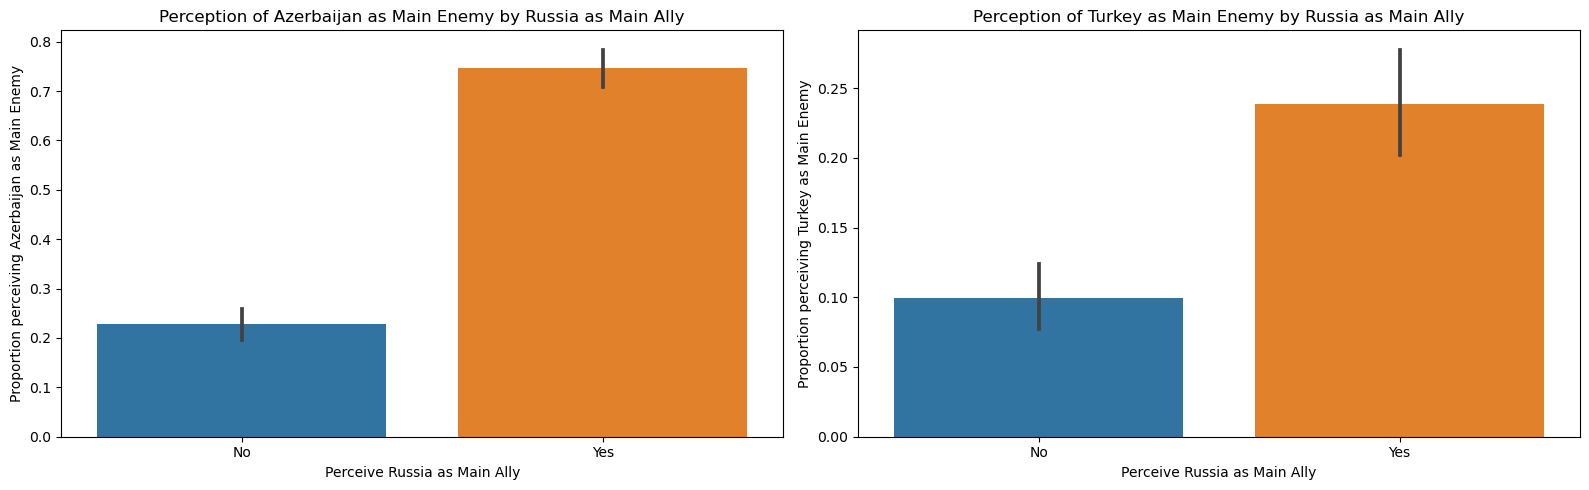

In [16]:

import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Mapping MAINENEM values to countries or groups
mainenem_mapping = {
    1.0: 'Abkhazia', 2.0: 'Afghanistan', 3.0: 'Arabia', 4.0: 'Argentina', 5.0: 'Armenia',
    6.0: 'Australia', 7.0: 'Austria', 8.0: 'Azerbaijan', 9.0: 'Baltic countries',
    10.0: 'Belgium', 11.0: 'Belarus', 12.0: 'Canada', 13.0: 'Cyprus', 14.0: 'Czech republic',
    15.0: 'Denmark', 16.0: 'Eastern European Countries', 17.0: 'Egypt', 18.0: 'Estonia',
    19.0: 'EU', 20.0: 'Finland', 21.0: 'France', 22.0: 'Great Britain', 23.0: 'Germany',
    24.0: 'Greece', 25.0: 'Iceland', 26.0: 'India', 27.0: 'Iran', 28.0: 'Iraq', 29.0: 'Ireland',
    30.0: 'Israel', 31.0: 'Italy', 32.0: 'Japan', 33.0: 'Kazakhstan', 34.0: 'Korea',
    35.0: 'Kyrgyzstan', 36.0: 'Latvia', 37.0: 'Lithuania', 38.0: 'Luxembourg', 39.0: 'Many',
    40.0: 'Mexico', 41.0: 'Moldova', 42.0: 'Muslim countries', 43.0: 'Neighbouring countries',
    44.0: 'Netherlands', 45.0: 'Norway', 46.0: 'Ossetia', 47.0: 'Palestine', 48.0: 'Poland',
    49.0: 'Portugal', 50.0: 'Romania', 51.0: 'Russia', 52.0: 'Slovakia', 53.0: 'Spain',
    54.0: 'Sweden', 55.0: 'Switzerland', 56.0: 'Syria', 57.0: 'Turkey', 58.0: 'UAE',
    59.0: 'Ukraine', 60.0: 'Uruguay', 61.0: 'USA', 62.0: 'Uzbekistan', 63.0: 'Venezuela',
    64.0: 'China', 65.0: 'Nagorno-Karabakh', 66.0: 'Sweden', 67.0: 'Georgia', 81.0: 'Everybody',
    82.0: 'Except Russia', 83.0: 'Foreigners', 84.0: 'Our country itself', 85.0: 'Globalism',
    86.0: 'Local government'
}

# Filter out rows where any relevant variable is below 0 (indicating error or non-response)
relevant_vars = ['MAINENEM', 'MAINFRN', 'PARTYSUPP', 'EDUYRS']
df_filtered = df[(df[relevant_vars] >= 0).all(axis=1)].copy()

# Map MAINENEM to specific countries or groups
df_filtered['MAINENEM_mapped'] = df_filtered['MAINENEM'].map(mainenem_mapping)

# Section II Analysis - Separate Analyses for Azerbaijan and Turkey

# Analysis for Azerbaijan
azerbaijan_bool = df_filtered['MAINENEM_mapped'] == 'Azerbaijan'
russia_ally_bool = (df_filtered['MAINFRN'] == 51.0).astype(int)

azerbaijan_ally_enemy = pd.crosstab(russia_ally_bool, azerbaijan_bool.astype(int), normalize='index')
print("\nRussia as Main Ally vs. Perception of Azerbaijan as Main Enemy:")
print(azerbaijan_ally_enemy)

# Logistic regression for Azerbaijan as Main Enemy
X_azerbaijan = sm.add_constant(russia_ally_bool)
model_azerbaijan = sm.Logit(azerbaijan_bool.astype(int), X_azerbaijan).fit()
print("\nLogistic Regression: Russia as Main Ally vs. Perception of Azerbaijan as Main Enemy")
print(model_azerbaijan.summary())

# Analysis for Turkey
turkey_bool = df_filtered['MAINENEM_mapped'] == 'Turkey'

turkey_ally_enemy = pd.crosstab(russia_ally_bool, turkey_bool.astype(int), normalize='index')
print("\nRussia as Main Ally vs. Perception of Turkey as Main Enemy:")
print(turkey_ally_enemy)

# Logistic regression for Turkey as Main Enemy
X_turkey = sm.add_constant(russia_ally_bool)
model_turkey = sm.Logit(turkey_bool.astype(int), X_turkey).fit()
print("\nLogistic Regression: Russia as Main Ally vs. Perception of Turkey as Main Enemy")
print(model_turkey.summary())

# Plotting relationships
plt.figure(figsize=(16, 5))

# Azerbaijan Plot
plt.subplot(1, 2, 1)
sns.barplot(x=russia_ally_bool, y=azerbaijan_bool.astype(int))
plt.title('Perception of Azerbaijan as Main Enemy by Russia as Main Ally')
plt.xlabel('Perceive Russia as Main Ally')
plt.ylabel('Proportion perceiving Azerbaijan as Main Enemy')
plt.xticks([0, 1], ['No', 'Yes'])

# Turkey Plot
plt.subplot(1, 2, 2)
sns.barplot(x=russia_ally_bool, y=turkey_bool.astype(int))
plt.title('Perception of Turkey as Main Enemy by Russia as Main Ally')
plt.xlabel('Perceive Russia as Main Ally')
plt.ylabel('Proportion perceiving Turkey as Main Enemy')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()


Was the dissolution of the Soviet Union a good or bad thing? (USSRDISS)
Respondents who support nationalist or conservative parties are more likely to view the dissolution as a bad thing.

Variable: PARTYSUPP
Respondents with higher personal income are more likely to view the dissolution as a good thing.

Variable: PERSINC
Respondents with more years of education are more likely to view the dissolution of the Soviet Union as a good thing.

Variable: EDUYRS
Older respondents are more likely to view the dissolution of the Soviet Union as a bad thing compared to younger respondents.

Variable: RESPAGE
Who is the main enemy of Armenia? (MAINENEM)
Respondents who support EU integration are more likely to perceive Russia as Armenia's main enemy.

Variable: EUSUPP
Respondents who consider Russia their main ally are less likely to view Russia as the enemy and more likely to perceive Turkey or Azerbaijan as Armenia's main enemy.

Variable: MAINFRN
Respondents who support nationalist or conservative parties are more likely to perceive Turkey as Armenia's main enemy.

Variable: PARTYSUPP
Who is the main friend of Armenia? (MAINFRN)
Older respondents are more likely to perceive Russia as Armenia's main friend compared to younger respondents.

Variable: RESPAGE
Respondents from higher-income families are more likely to perceive the European Union (EU) or the United States as Armenia's main friend.

Variable: FATEINLF
Respondents who perceive Turkey or Azerbaijan as Armenia's main enemy are more likely to perceive Russia as Armenia's main friend.

Variable: MAINENEM
Respondents with more years of education are more likely to perceive Russia as Armenia's main enemy.

Variable: EDUYRS
What is your opinion about the EU? (EUSUPP)
Younger respondents are more likely to have a positive opinion about the EU compared to older respondents.

Variable: RESPAGE
Respondents who support liberal or pro-European political parties are more likely to have a positive opinion of the EU.

Variable: PARTYSUPP
Respondents with more years of education are more likely to have a positive opinion of the EU.

Variable: EDUYRS
Respondents who consider religion very important may have a more skeptical opinion of the EU, especially if they perceive it as secular or opposed to traditional values.

Variable: RELIMP

Liberals - Civil Contract , Bright Armenia, Free Democrats, Hanrapetutyun Party, Mission Party

Conservatives - Armenian Revolutionary Federation, Prosperous Armenia, Sasna Tser Party, Republican Party of Armenia